### 패키지불러옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,901 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [ ]:
# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive

# 드라이브 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 생성

In [ ]:
# 데이터 생성

df = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/1 교통사고/20 도로교통공단_가해운전자 음주정도별 주야별 교통사고 통계_2022.csv',
                 encoding='euc-kr')

df.describe(include='all')


,가해자음주정도,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,17,17,17.000000,17.000000,17.000000,17.000000,17.000000
unique,9,2,NaN,NaN,NaN,NaN,NaN
top,0.030~0.049%,야,NaN,NaN,NaN,NaN,NaN
freq,2,9,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,885.823529,12.588235,227.588235,1139.411765,60.117647
std,NaN,NaN,1311.028186,16.778181,336.772375,1679.547784,82.246491
min,NaN,NaN,14.000000,0.000000,2.000000,20.000000,0.000000
25%,NaN,NaN,100.000000,2.000000,23.000000,139.000000,9.000000
50%,NaN,NaN,328.000000,6.000000,83.000000,454.000000,29.000000
75%,NaN,NaN,863.000000,18.000000,221.000000,1148.000000,59.000000


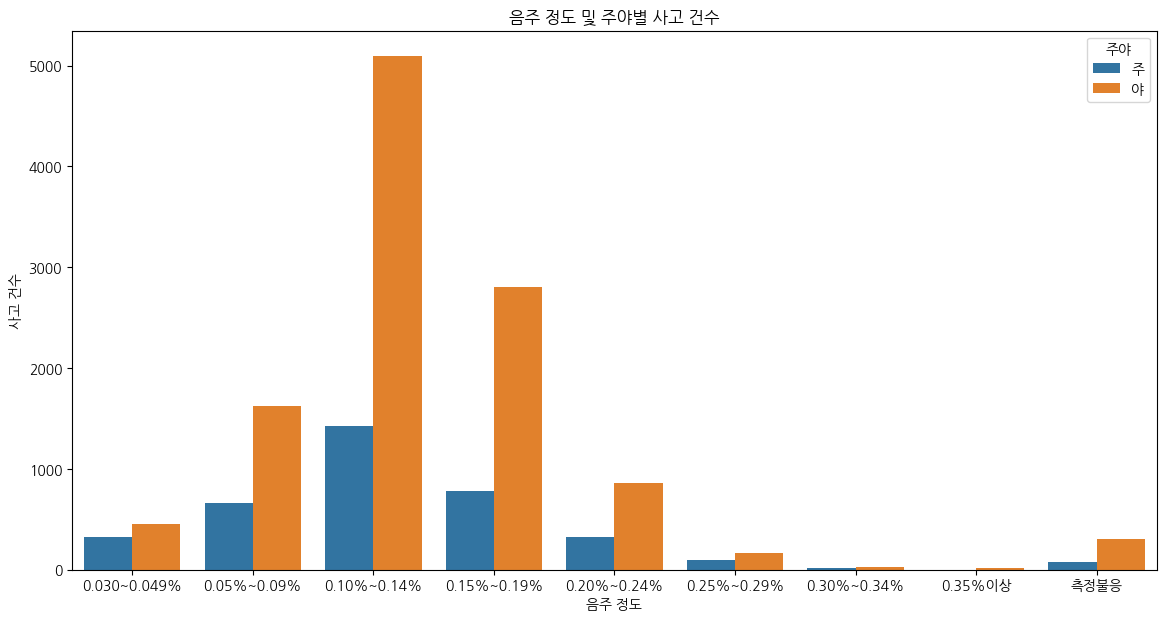

In [ ]:
# 음주 정도별 사고 건수 시각화
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='가해자음주정도', y='사고건수', hue='주야')
plt.title('음주 정도 및 주야별 사고 건수')
plt.xlabel('음주 정도')
plt.ylabel('사고 건수')
plt.legend(title='주야')
plt.show()


# 해석: 오히려 과음하지 않은 0.1~0.14에서 가장 사고건수에 영향을 받는다.


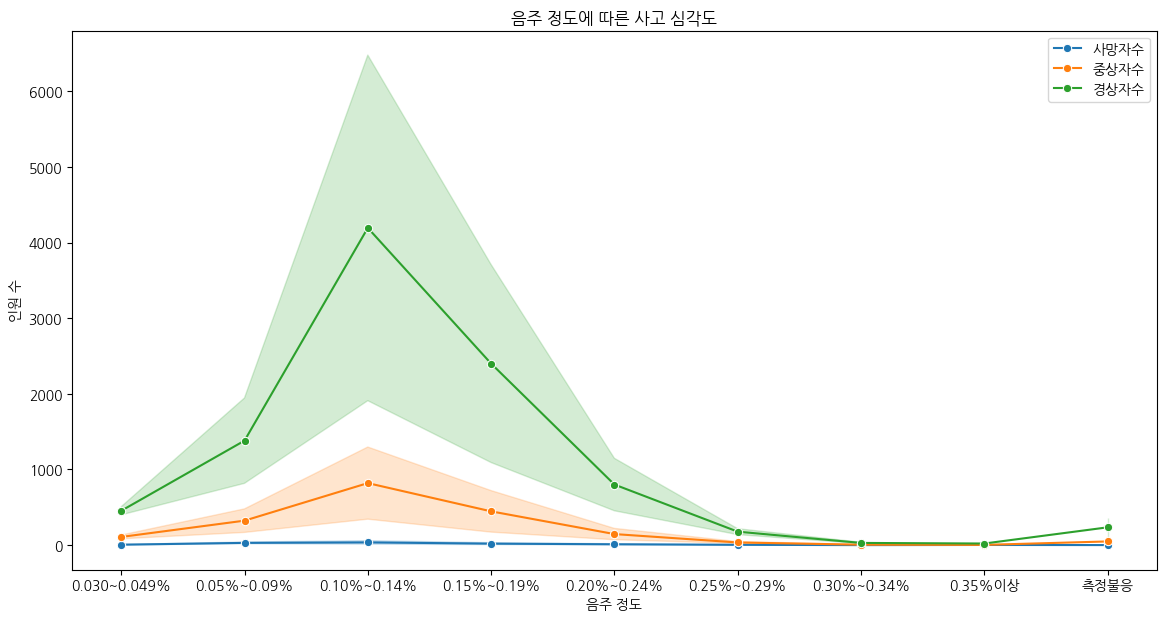

In [ ]:
# 음주 정도에 따른 사고 심각도 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='가해자음주정도', y='사망자수', marker='o', label='사망자수')
sns.lineplot(data=df, x='가해자음주정도', y='중상자수', marker='o', label='중상자수')
sns.lineplot(data=df, x='가해자음주정도', y='경상자수', marker='o', label='경상자수')
plt.title('음주 정도에 따른 사고 심각도')
plt.xlabel('음주 정도')
plt.ylabel('인원 수')
plt.legend()
plt.show()

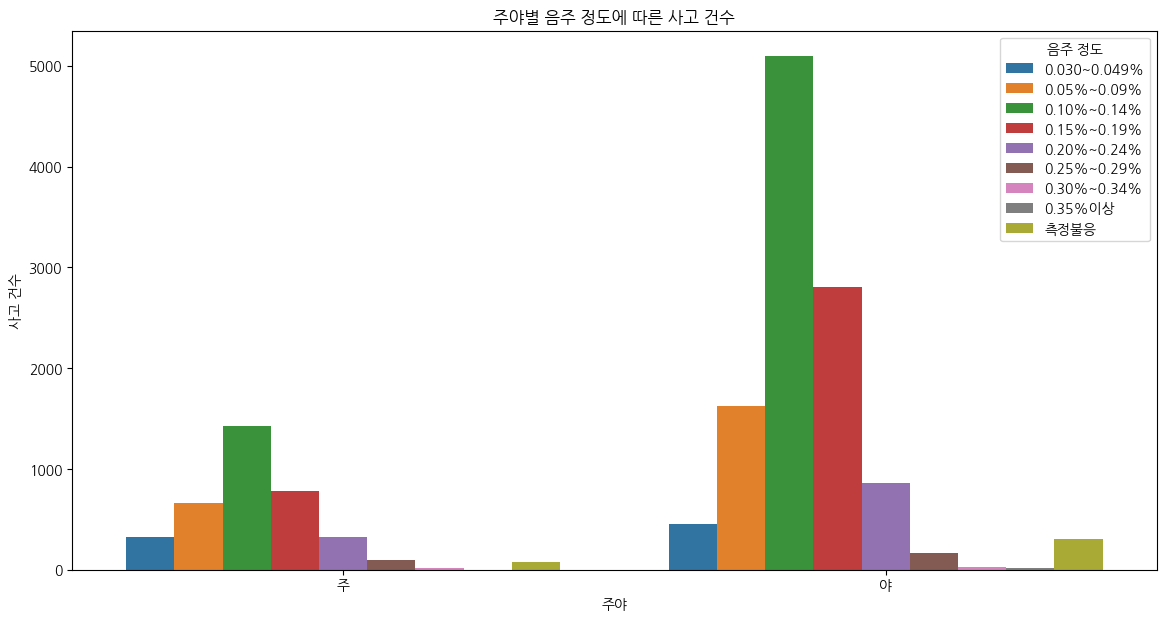

In [ ]:
# 주야별 사고 데이터 분석
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='주야', y='사고건수', hue='가해자음주정도')
plt.title('주야별 음주 정도에 따른 사고 건수')
plt.xlabel('주야')
plt.ylabel('사고 건수')
plt.legend(title='음주 정도')
plt.show()

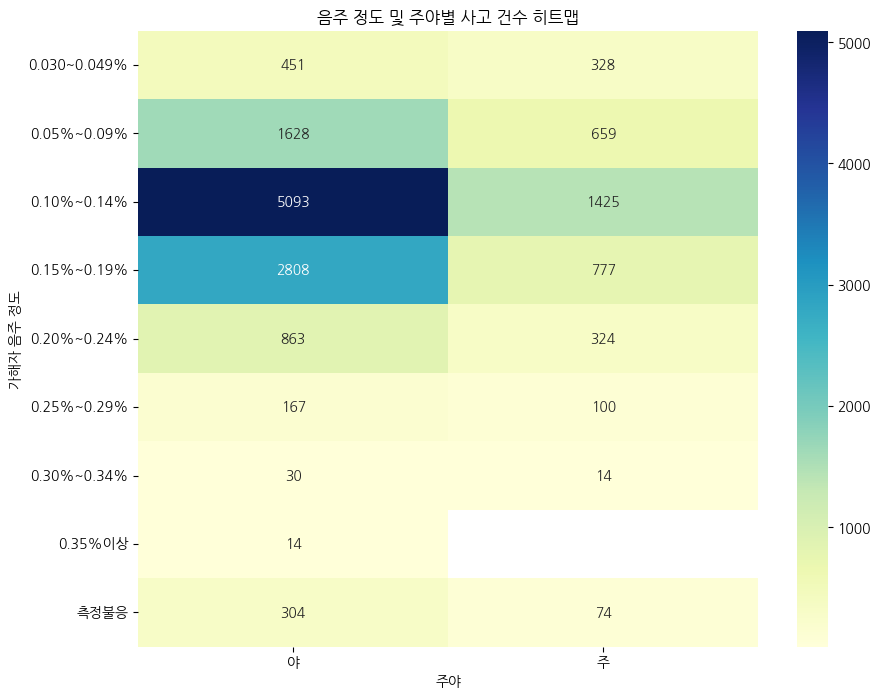

In [ ]:
# 히트맵 시각화
# 피벗 테이블 생성
pivot_table = df.pivot_table(index='가해자음주정도', columns='주야', values='사고건수', aggfunc='sum')

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('음주 정도 및 주야별 사고 건수 히트맵')
plt.xlabel('주야')
plt.ylabel('가해자 음주 정도')
plt.show()

# 짙을수록 사고건수가 많음

            사고건수      사망자수      중상자수      경상자수    부상신고자수
사고건수    1.000000  0.927498  0.998450  0.999330  0.996853
사망자수    0.927498  1.000000  0.943049  0.918236  0.943779
중상자수    0.998450  0.943049  1.000000  0.996185  0.997577
경상자수    0.999330  0.918236  0.996185  1.000000  0.994379
부상신고자수  0.996853  0.943779  0.997577  0.994379  1.000000


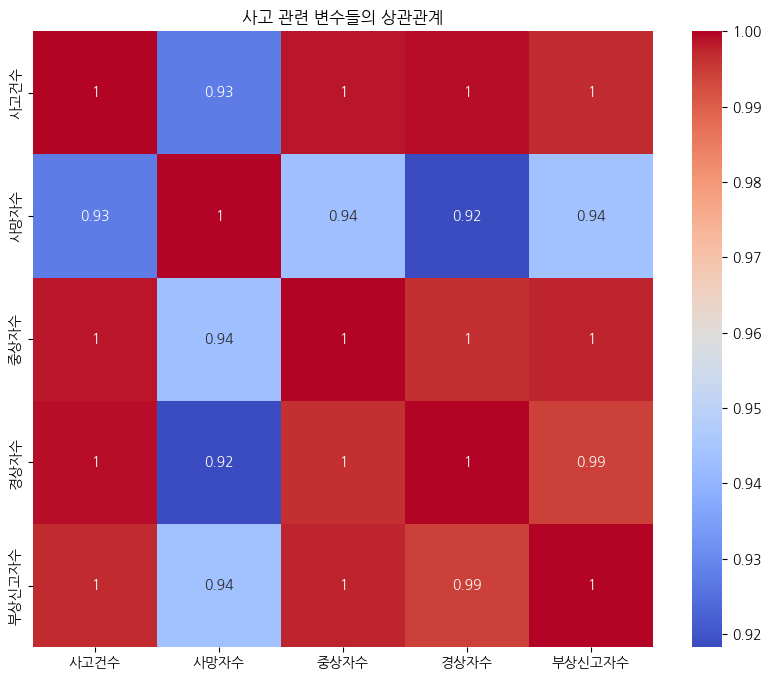

In [ ]:
# 상관분석
correlation_matrix = df[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('사고 관련 변수들의 상관관계')
plt.show()




In [ ]:
# 가해자음주정도와 주야에 따른 평균 사고건수 계산
grouped = df.groupby(['가해자음주정도', '주야'])['사고건수'].mean().reset_index()
print("\nGrouped DataFrame with Mean Accident Counts:")
print(grouped)



Grouped DataFrame with Mean Accident Counts:
         가해자음주정도 주야    사고건수
0   0.030~0.049%  야   451.0
1   0.030~0.049%  주   328.0
2    0.05%~0.09%  야  1628.0
3    0.05%~0.09%  주   659.0
4    0.10%~0.14%  야  5093.0
5    0.10%~0.14%  주  1425.0
6    0.15%~0.19%  야  2808.0
7    0.15%~0.19%  주   777.0
8    0.20%~0.24%  야   863.0
9    0.20%~0.24%  주   324.0
10   0.25%~0.29%  야   167.0
11   0.25%~0.29%  주   100.0
12   0.30%~0.34%  야    30.0
13   0.30%~0.34%  주    14.0
14       0.35%이상  야    14.0
15          측정불응  야   304.0
16          측정불응  주    74.0


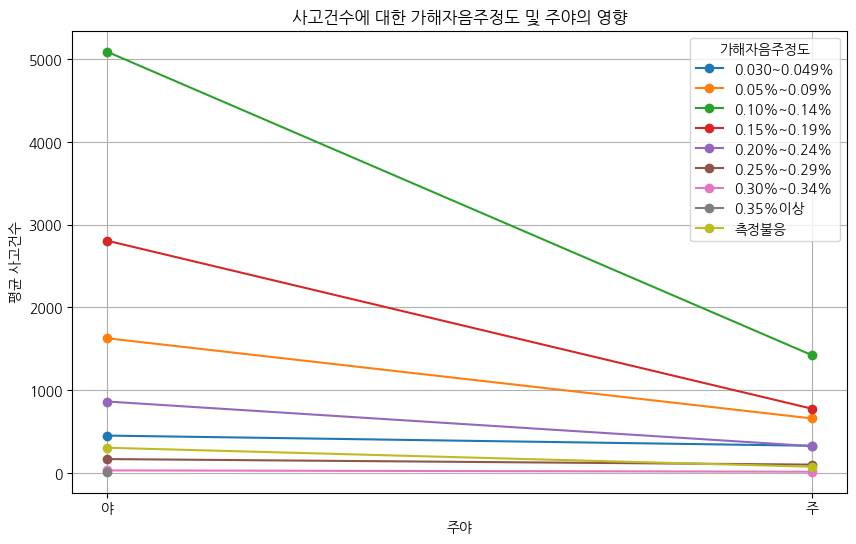

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
for level in df['가해자음주정도'].unique():
    subset = grouped[grouped['가해자음주정도'] == level]
    plt.plot(subset['주야'], subset['사고건수'], marker='o', label=level)

plt.title('사고건수에 대한 가해자음주정도 및 주야의 영향')
plt.xlabel('주야')
plt.ylabel('평균 사고건수')
plt.legend(title='가해자음주정도')
plt.grid(True)
plt.show()


In [ ]:
#다중회귀분석으로 영향력을 숫자로 계산


# 가해자음주정도와 주야를 더미 변수로 변환
df_encoded = pd.get_dummies(df, columns=['가해자음주정도', '주야'], drop_first=True)

# 필요하지 않은 열 제거
df_encoded = df_encoded.drop(columns=['기타변수'])


df_encoded



,사고건수,가해자음주정도_0.05%~0.09%,가해자음주정도_0.10%~0.14%,가해자음주정도_0.15%~0.19%,가해자음주정도_0.20%~0.24%,가해자음주정도_0.25%~0.29%,가해자음주정도_0.30%~0.34%,가해자음주정도_0.35%이상,가해자음주정도_측정불응,주야_주
0,328,False,False,False,False,False,False,False,False,True
1,451,False,False,False,False,False,False,False,False,False
2,659,True,False,False,False,False,False,False,False,True
3,1628,True,False,False,False,False,False,False,False,False
4,1425,False,True,False,False,False,False,False,False,True
5,5093,False,True,False,False,False,False,False,False,False
6,777,False,False,True,False,False,False,False,False,True
7,2808,False,False,True,False,False,False,False,False,False
8,324,False,False,False,True,False,False,False,False,True
9,863,False,False,False,True,False,False,False,False,False


In [ ]:
import pandas as pd
import statsmodels.api as sm

# boolean 타입을 숫자형으로 변환
df_encoded = df_encoded.applymap(lambda x: 1 if x is True else 0 if x is False else x)

# 독립 변수와 종속 변수 설정
X = df_encoded.drop(columns=['사고건수'])
y = df_encoded['사고건수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 학습
model = sm.OLS(y, X).fit()

# 결과 출력
print("\nRegression Model Summary:")
print(model.summary())




Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   사고건수   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2.917
Date:                Thu, 04 Jul 2024   Prob (F-statistic):             0.0861
Time:                        15:34:46   Log-Likelihood:                -132.40
No. Observations:                  17   AIC:                             284.8
Df Residuals:                       7   BIC:                             293.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


해석
R-squared (R²): 0.789

모델이 종속 변수의 변동을 78.9% 설명합니다. 이는 비교적 높은 설명력을 의미합니다.
Adj. R-squared: 0.519

모델의 자유도를 고려한 조정된 설명력입니다. 51.9%로 R²보다 낮습니다. 이는 모델에 포함된 변수 중 일부가 종속 변수 설명에 크게 기여하지 않을 수 있음을 시사합니다.
F-statistic: 2.917

모델 전체의 유의미성을 나타냅니다.
Prob (F-statistic): 0.0861

F-검정의 p-value로, 0.05보다 크기 때문에 모델 전체는 통계적으로 유의미하지 않을 수 있습니다.

개별 변수 해석
const (상수항): 867.1875 (p-value: 0.244)

상수항은 모델에서의 기본 값입니다. 통계적으로 유의미하지 않습니다 (p-value > 0.05).
가해자음주정도_0.05%~0.09%: 754.0000 (p-value: 0.434)

가해자 음주 정도가 0.05%~0.09%일 때, 사고건수가 약 754만큼 증가합니다. 그러나 통계적으로 유의미하지 않습니다.
가해자음주정도_0.10%~0.14%: 2869.5000 (p-value: 0.016)

가해자 음주 정도가 0.10%~0.14%일 때, 사고건수가 약 2869.5만큼 증가합니다. 통계적으로 유의미합니다 (p-value < 0.05).
가해자음주정도_0.15%~0.19%: 1403.0000 (p-value: 0.167)

가해자 음주 정도가 0.15%~0.19%일 때, 사고건수가 약 1403만큼 증가합니다. 통계적으로 유의미하지 않습니다.
가해자음주정도_0.20%~0.24%: 204.0000 (p-value: 0.829)

가해자 음주 정도가 0.20%~0.24%일 때, 사고건수가 약 204만큼 증가합니다. 통계적으로 유의미하지 않습니다.
가해자음주정도_0.25%~0.29%: -256.0000 (p-value: 0.786)

가해자 음주 정도가 0.25%~0.29%일 때, 사고건수가 약 256만큼 감소합니다. 통계적으로 유의미하지 않습니다.
가해자음주정도_0.30%~0.34%: -367.5000 (p-value: 0.698)

가해자 음주 정도가 0.30%~0.34%일 때, 사고건수가 약 367.5만큼 감소합니다. 통계적으로 유의미하지 않습니다.
가해자음주정도_0.35%이상: -853.1875 (p-value: 0.477)

가해자 음주 정도가 0.35% 이상일 때, 사고건수가 약 853.19만큼 감소합니다. 통계적으로 유의미하지 않습니다.
가해자음주정도_측정불응: -200.5000 (p-value: 0.832)

가해자가 측정에 불응할 때, 사고건수가 약 200.5만큼 감소합니다. 통계적으로 유의미하지 않습니다.
주야_주: -955.3750 (p-value: 0.074)

주간일 때, 사고건수가 약 955.38만큼 감소합니다. p-value가 0.074로 0.05보다 크지만, 약간의 유의미성을 가질 수 있습니다.

결론
유의미한 변수는 **가해자음주정도_0.10%~0.14%** (p-value: 0.016)입니다.

이는 가해자가 0.10%~0.14% 음주 상태일 때 사고건수가 유의미하게 증가함을 나타냅니다.
다른 변수들은 통계적으로 유의미하지 않으며, 이들 변수는 사고건수에 유의미한 영향을 미치지 않는다고 볼 수 있습니다.
모델 전체는 R-squared가 높지만, F-statistic의 p-value가 0.0861로 0.05보다 크기 때문에 모델 전체의 유의미성은 확신할 수 없습니다. 이는 추가 변수나 데이터가 필요함을 시사합니다.

# 교통사고 현황

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/1 교통사고/교통사고+현황(구별)_20240623190625.csv',
                 encoding='utf-8')

df2 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/1 교통사고/교통사고+현황(구별)_20240623190639.csv',
                 encoding='utf-8')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/1 교통사고/교통사고+현황(구별)_20240623190625.csv'

In [ ]:
# 첫 번째 행을 열 이름으로 설정하고, 첫 번째 행 삭제
#df.columns = df.iloc[0]
df = df.drop(0)

# 두 번째 행(즉, 인덱스가 1인 행) 삭제
#df = df.drop(1)

# 결과 확인
print(df.head())

        가해자음주정도 주야  사고건수  사망자수  중상자수  경상자수  부상신고자수
1  0.030~0.049%  야   451     9   133   508      29
2   0.05%~0.09%  주   659    18   168   817      59
3   0.05%~0.09%  야  1628    41   479  1946     119
4   0.10%~0.14%  주  1425    13   343  1910      89
5   0.10%~0.14%  야  5093    59  1297  6480     324


In [ ]:
# 첫 번째 열 제거
df = df.drop(df.columns[0], axis=1)

df.head()

,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
1,야,451,9,133,508,29
2,주,659,18,168,817,59
3,야,1628,41,479,1946,119
4,주,1425,13,343,1910,89
5,야,5093,59,1297,6480,324


In [ ]:
# 숫자형으로 변환할 열 선택
columns_to_convert = ['2018', '2019', '2020', '2021', '2022', '2023']

# 각 열을 숫자형으로 변환
df[columns_to_convert] = df[columns_to_convert].astype(int)

df.describe(include='all')

KeyError: "None of [Index(['2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')] are in the [columns]"

In [ ]:
# 시각화
# 자치구별(2)를 인덱스로 설정
df.set_index('자치구별(2)', inplace=True)

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 사이즈 설정

# 각 자치구별로 반복하면서 꺾은선 그래프 그리기
for 구 in df.index:
    plt.plot(df.columns, df.loc[구], marker='o', label=구)

plt.title('자치구별 연도별 사고 건수')  # 그래프 제목 설정
plt.xlabel('연도')  # x축 라벨 설정
plt.ylabel('사고 건수')  # y축 라벨 설정
plt.xticks(df.columns)  # x축에 연도 표시
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시

plt.show()  # 그래프 출력

In [ ]:
# 2022년과 2023년의 평균을 구하기
df['평균'] = df[['2022', '2023']].mean(axis=1)

# 평균을 기준으로 정렬하여 순위 매기기
df_sorted = df.sort_values(by='평균', ascending=False)

# 순위 출력
rank = df_sorted.reset_index(drop=True)

In [ ]:
df_sorted

In [ ]:
# 평균값으로 정렬된 데이터프레임을 만들었다고 가정합니다
#sorted_df = df.mean(axis=1).sort_values(ascending=False)

# 순위를 계산하여 순위 열을 추가합니다
df_sorted['순위'] = np.arange(1, len(df) + 1)

# 결과 확인
print(df_sorted)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/1 교통사고/교통사고+현황(구별)_20240623190639.csv',
                 encoding='utf-8')
df2.head()

In [ ]:
# 첫 번째 행을 열 이름으로 설정하고, 첫 번째 행 삭제
#df.columns = df.iloc[0]
df2 = df2.drop(0)

# 첫 번째 열 제거
df2 = df2.drop(df2.columns[0], axis=1)

df2.head()


In [ ]:
# 숫자형으로 변환할 열 선택
columns_to_convert = ['2018', '2019', '2020', '2021', '2022', '2023']

# 각 열을 숫자형으로 변환
df2[columns_to_convert] = df2[columns_to_convert].astype(float).round(1)


df2.describe(include='all')

In [ ]:
# 시각화
# 자치구별(2)를 인덱스로 설정
df2.set_index('자치구별(2)', inplace=True)

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 사이즈 설정

# 각 자치구별로 반복하면서 꺾은선 그래프 그리기
for 구 in df2.index:
    plt.plot(df2.columns, df2.loc[구], marker='o', label=구)

plt.title('자치구별 연도별 사고 건수')  # 그래프 제목 설정
plt.xlabel('연도')  # x축 라벨 설정
plt.ylabel('사고 건수')  # y축 라벨 설정
plt.xticks(df2.columns)  # x축에 연도 표시
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시

plt.show()  # 그래프 출력

In [ ]:
# 2022년과 2023년의 평균을 구하기
df2['평균'] = df2[['2022', '2023']].mean(axis=1)

# 평균을 기준으로 정렬하여 순위 매기기
df2_sorted = df2.sort_values(by='평균', ascending=False)

# 순위 출력
rank = df2_sorted.reset_index(drop=True)

In [ ]:
df2_sorted

In [ ]:

# 순위를 계산하여 순위 열을 추가합니다
#df2_sorted['밀도별 순위'] = np.arange(1, len(df) + 1)

# 결과 확인
print(df2_sorted)

In [ ]:
print(df_sorted.columns)
print(df2_sorted.columns)
print(merged_df.index)

In [ ]:
import pandas as pd

# 기존 데이터프레임이 인덱스를 '자치구별(2)'로 가지고 있는 경우
# df_sorted와 df2_sorted가 이미 존재한다고 가정

# 인덱스를 열로 변환
df_sorted_reset = df_sorted.reset_index()
df2_sorted_reset = df2_sorted.reset_index()

# 병합 수행
merged_df = pd.merge(df_sorted_reset, df2_sorted_reset[['자치구별(2)', '밀도별 순위']], on='자치구별(2)', how='left')

# 병합 후 다시 '자치구별(2)'를 인덱스로 설정
merged_df.set_index('자치구별(2)', inplace=True)

# 결과 출력
print(merged_df)
